In [1]:
# Load Iris Dataset
import numpy as np
from sklearn import datasets

# Load Dataset with first 2 Features
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
print(x.shape)
print(y.shape)

# Dataset variables
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = 3
test_size = 20
train_size = num_samples - test_size

# Split Data in Train and Testset
indices = np.random.permutation(num_samples)
x_train = x[indices[:-20]]
y_train = y[indices[:-20]]

x_test = x[indices[-20:]]
y_test = y[indices[-20:]]

(150, 2)
(150,)


In [2]:
# Training Size
print(x_train.shape)
print(y_train.shape)

# Testing Size
print(x_test.shape)
print(y_test.shape)

(130, 2)
(130,)
(20, 2)
(20,)


In [3]:
# Model
from sklearn.neighbors import KNeighborsClassifier

neighbors = [i for i in range(1, 10)]
weights = ["uniform", "distance"]

for neighbor in neighbors:
    for weight in weights:
        knn = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
        knn.fit(x_train, y_train)
        score = knn.score(x_test, y_test)
        print("Score for setup: ", neighbor, " N, " , weight, " W - Score = ", score)

Score for setup:  1  N,  uniform  W - Score =  0.65
Score for setup:  1  N,  distance  W - Score =  0.65
Score for setup:  2  N,  uniform  W - Score =  0.65
Score for setup:  2  N,  distance  W - Score =  0.65
Score for setup:  3  N,  uniform  W - Score =  0.7
Score for setup:  3  N,  distance  W - Score =  0.65
Score for setup:  4  N,  uniform  W - Score =  0.6
Score for setup:  4  N,  distance  W - Score =  0.65
Score for setup:  5  N,  uniform  W - Score =  0.7
Score for setup:  5  N,  distance  W - Score =  0.65
Score for setup:  6  N,  uniform  W - Score =  0.8
Score for setup:  6  N,  distance  W - Score =  0.65
Score for setup:  7  N,  uniform  W - Score =  0.8
Score for setup:  7  N,  distance  W - Score =  0.7
Score for setup:  8  N,  uniform  W - Score =  0.75
Score for setup:  8  N,  distance  W - Score =  0.65
Score for setup:  9  N,  uniform  W - Score =  0.8
Score for setup:  9  N,  distance  W - Score =  0.7


In [4]:
# Use "best Setup"
best_neighbor = 3
best_weight = "uniform"

knn = KNeighborsClassifier(n_neighbors=best_neighbor, weights=best_weight)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)
pred_prob = knn.predict_proba(x_test)

print("Predictions vs. Classes:")
print("Pred:  ", pred)
print("Class: ", y_test)
print("\nPrediction Probs:")
print(pred_prob)

Predictions vs. Classes:
Pred:   [2 2 0 0 2 2 1 2 1 0 2 0 0 2 2 1 2 0 2 1]
Class:  [1 2 0 0 1 2 1 1 1 0 2 0 0 2 2 2 1 0 1 1]

Prediction Probs:
[[0.         0.33333333 0.66666667]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.         1.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         1.         0.        ]]


In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])

def make_meshgrid(x, y):
    x = np.arange(x.min()-1, x.max()+1, 0.01) # 0, 0.05, 0.1, 0.15, ......, 2.0
    y = np.arange(y.min()-1, y.max()+1, 0.01) # 0, 0.05, 0.1, 0.15, ......, 2.0
    xx, yy = np.meshgrid(x, y)
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **params)

def plot_knn(x_train, y_train, x_test, y_test):
    colors = ["red", "blue", "green"]
    fig, ax = plt.subplots()
    X0 = x_train[:,0]
    X1 = x_train[:,1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, knn, xx, yy, cmap=cmap_light, alpha=0.5)
    for index, point in enumerate(x_train):
        plt.scatter(point[0], point[1], color=colors[y_train[index]], marker="o", s=20.0)
    for index, point in enumerate(x_test):
        plt.scatter(point[0], point[1], color=colors[y_test[index]], marker="*", s=20.0)
    plt.show()

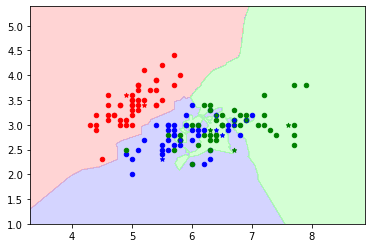

In [6]:
plot_knn(x_train, y_train, x_test, y_test)